/home/yan481/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/yan481/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


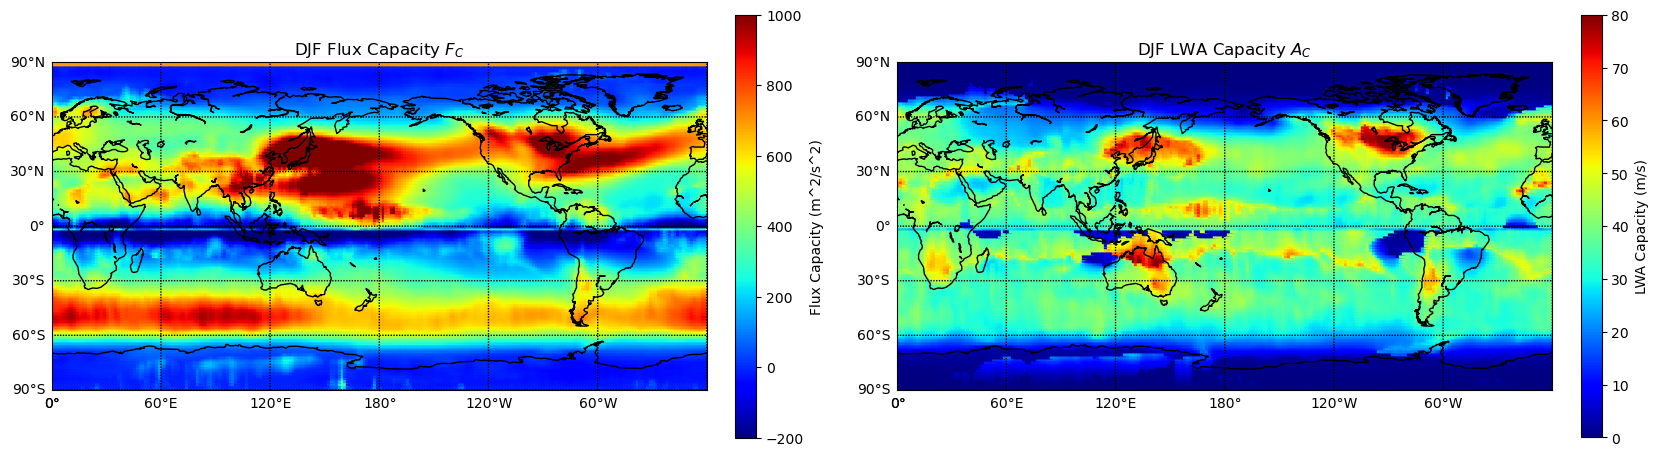

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load CSV data
data = pd.read_csv("/scratch/negishi/yan481/KenYan_Traffic_Model/Scatter_Plot_Global_New_DJF/regression_results.csv")

# Extract the necessary columns
def extract_lat(loc):
    lat_str = loc.split(",")[0].replace("(", "").strip()
    if "°S" in lat_str:
        return -float(lat_str.replace("°S", ""))
    else:
        return float(lat_str.replace("°N", ""))

def extract_lon(loc):
    lon_str = loc.split(",")[1].replace(")", "").strip()
    if "°W" in lon_str:
        return 360.0 - float(lon_str.replace("°W", ""))
    else:
        return float(lon_str.replace("°E", ""))

data['Lat'] = data['Location'].apply(extract_lat)
data['Lon'] = data['Location'].apply(extract_lon)

data['x2_coefficient'] = data['Best Fitting Curve'].apply(lambda equation: float(equation.split(" + ")[1].split("x^2")[0]))
data['Max_Flux'] = data['Max Flux Point (LWA, Flux)'].apply(lambda point: float(point.split(",")[1].replace(")", "")))
data['Correspondent_LWA'] = data['Max Flux Point (LWA, Flux)'].apply(lambda point: float(point.split(",")[0].replace("(", "")))

# Function to plot heatmap with contours for regions where the coefficient of x^2 term is <0.05
def plot_heatmap(values1, title1, vmin1, vmax1, values2, title2, vmin2, vmax2):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    for ax, values, title, vmin, vmax, label in zip(
        axes, [values1, values2], [title1, title2], [vmin1, vmin2], [vmax1, vmax2], ['Flux Capacity (m^2/s^2)', 'LWA Capacity (m/s)']):
        
        m = Basemap(projection='cyl', llcrnrlon=0, llcrnrlat=-90, urcrnrlon=360, urcrnrlat=90, ax=ax)
        m.drawcoastlines()
        m.drawparallels(np.arange(-90, 91, 30), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(0, 361, 60), labels=[0, 0, 0, 1])
        xi, yi = m(data['Lon'].values, data['Lat'].values)
        cs = m.scatter(xi, yi, c=values, cmap="jet", marker="s", s=20, vmin=vmin, vmax=vmax)
        
        cb = plt.colorbar(cs, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
        cb.set_label(label)
        ax.set_title(title)
    
    output_path = f"/scratch/negishi/yan481/KenYan_Traffic_Model/Scatter_Plot_Global_New_DJF/heatmap_combined.png"
#     plt.savefig(output_path)
    plt.show()

# Create the heatmaps
plot_heatmap(data['Max_Flux'].values, "DJF Flux Capacity $F_{C}$", -200, 1000,
             data['Correspondent_LWA'].values, "DJF LWA Capacity $A_{C}$", 0, 80)

# Reshape the arrays to 2D format (121x240)
flux_capacity_2d = data['Max_Flux'].values.reshape(121, 240)
lwa_capacity_2d = data['Correspondent_LWA'].values.reshape(121, 240)

# # Save the 2D arrays as .npy files
# np.save("/scratch/negishi/yan481/KenYan_Traffic_Model/Flux_Capacity_DJF_240730.npy", flux_capacity_2d)
# np.save("/scratch/negishi/yan481/KenYan_Traffic_Model/LWA_Capacity_DJF.npy", lwa_capacity_2d)
